In [1]:
import sqlite3
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading data from the sqlite database created
db = sqlite3.connect('health_air.db')
cursor = db.cursor()
#quesrying the database to check the name of the tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('air',), ('asthma',)]


In [3]:
#dictionary to retrieve the state acronym from the state name
# thank you @rogerallen
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
#dictionary to retrieve the state name from the acronym
# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))


In [4]:
#creating a list containing all the states
states = list(us_state_abbrev.keys())
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [5]:
#importing the asthma table in pandas
asthma = pd.read_sql_query("SELECT * from %s" % 'asthma', db)
# filtering by datavaluetype
asthma = asthma[asthma['datavaluetype'] == 'Age-adjusted Prevalence']
asthma

,index,year,state_id,question,datavaluetype,datavalue,datavalueunit
14,22888,2019,AL,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.4,%
16,22895,2012,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.1,%
17,22903,2014,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,8.2,%
20,22943,2011,CT,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,10.1,%
22,22966,2015,AL,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.9,%
...,...,...,...,...,...,...,...
904,37320,2011,MT,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.4,%
906,37353,2015,KS,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,8.6,%
909,37426,2018,MO,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.5,%
911,37524,2013,ID,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,8.7,%


In [6]:
asthma = asthma.sort_values(['state_id', 'year'])
asthma

,index,year,state_id,question,datavaluetype,datavalue,datavalueunit
95,23497,2011,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,8.5,%
16,22895,2012,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.1,%
108,23574,2013,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.4,%
17,22903,2014,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,8.2,%
114,23598,2015,AK,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.3,%
...,...,...,...,...,...,...,...
792,35680,2015,WY,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,7.7,%
369,28250,2016,WY,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.6,%
450,29631,2017,WY,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,9.2,%
223,25647,2018,WY,Current asthma prevalence among adults aged >=...,Age-adjusted Prevalence,8.7,%


In [7]:
air = pd.read_sql_query("SELECT * from %s" % 'air', db)
air = air.sort_values(['State', 'Year'])
air

,index,State,Year,Max AQI,Median AQI,Days Ozone,Days PM2.5,Days PM10
0,0,Alabama,2010,112,46,131,142,8
1,1,Alabama,2011,111,42,158,84,4
2,2,Alabama,2012,110,40,174,85,3
3,3,Alabama,2013,86,37,173,84,3
4,4,Alabama,2014,93,38,173,83,3
...,...,...,...,...,...,...,...,...
535,535,Wyoming,2015,110,34,235,29,42
536,536,Wyoming,2016,95,37,266,16,44
537,537,Wyoming,2017,169,38,259,18,42
538,538,Wyoming,2018,107,39,269,14,41


In [8]:
print(air.Year.unique())
print(asthma.year.unique())
air = air[~air['Year'].isin([2010])]
air

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
['2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']


,index,State,Year,Max AQI,Median AQI,Days Ozone,Days PM2.5,Days PM10
1,1,Alabama,2011,111,42,158,84,4
2,2,Alabama,2012,110,40,174,85,3
3,3,Alabama,2013,86,37,173,84,3
4,4,Alabama,2014,93,38,173,83,3
5,5,Alabama,2015,105,39,137,145,3
...,...,...,...,...,...,...,...,...
535,535,Wyoming,2015,110,34,235,29,42
536,536,Wyoming,2016,95,37,266,16,44
537,537,Wyoming,2017,169,38,259,18,42
538,538,Wyoming,2018,107,39,269,14,41


We are missing information for -9 year(s) for District of Columbia
We are missing information for -9 year(s) for District of Columbia
We are missing information for 1 year(s) for New Jersey
We are missing information for 1 year(s) for New Jersey


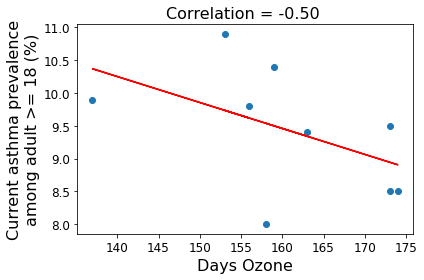

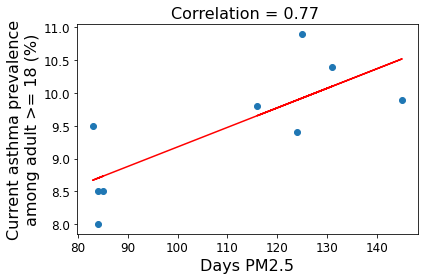

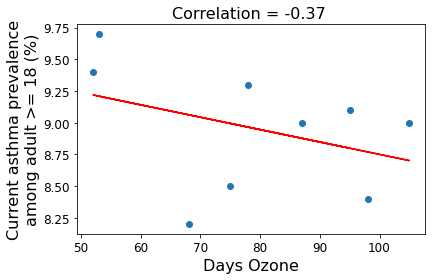

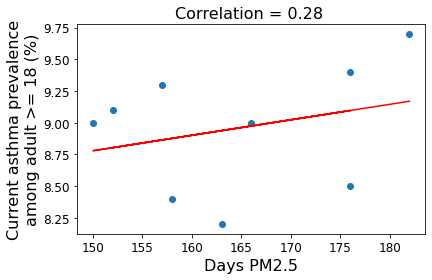

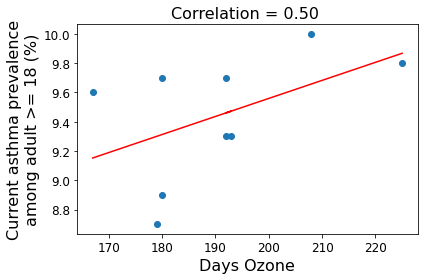

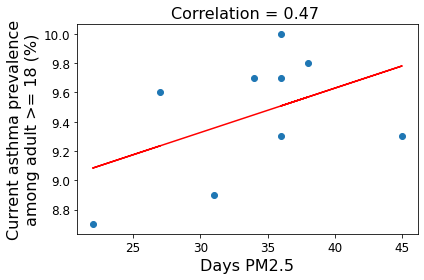

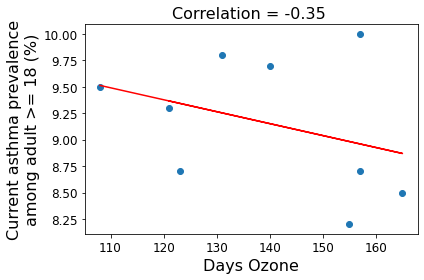

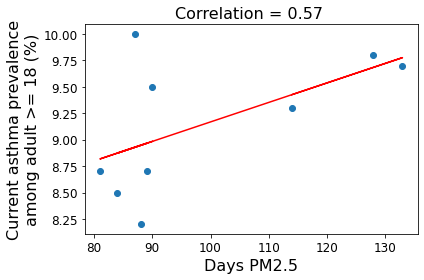

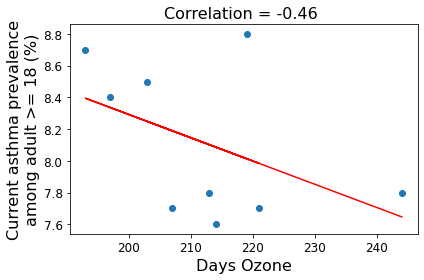

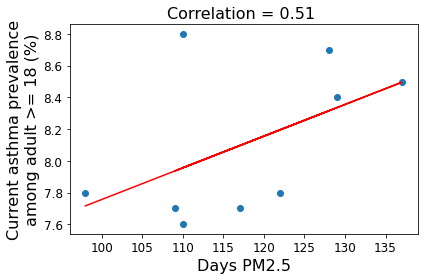

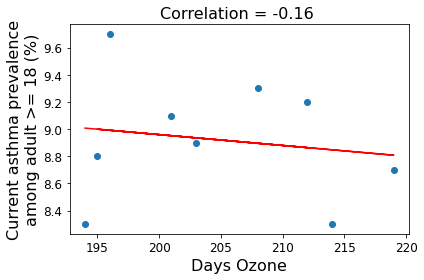

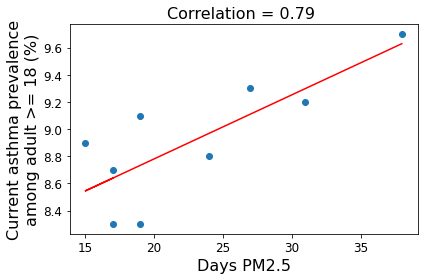

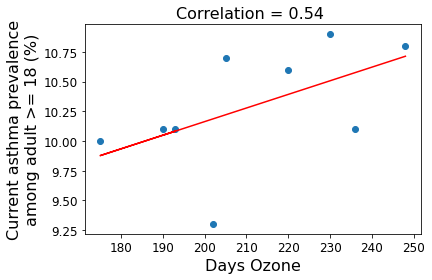

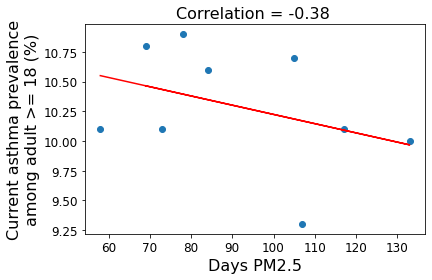

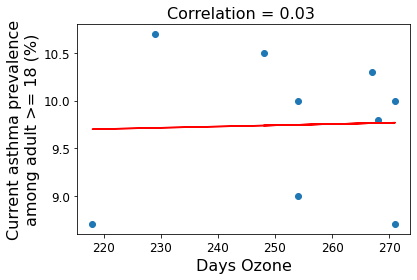

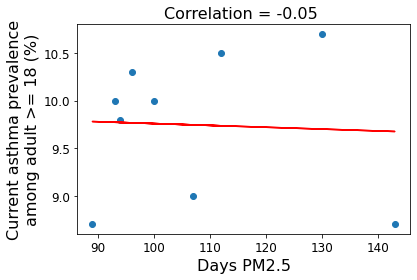

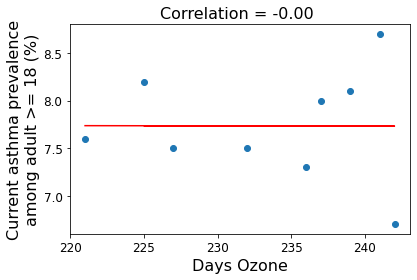

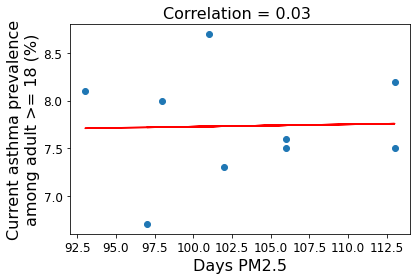

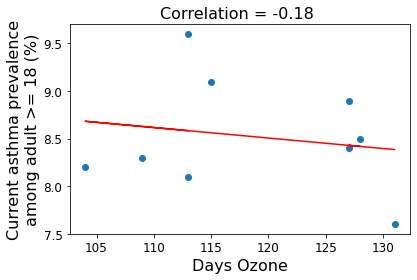

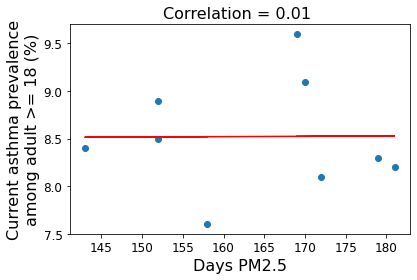

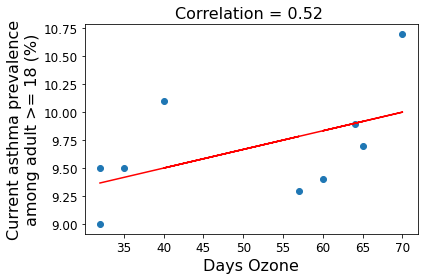

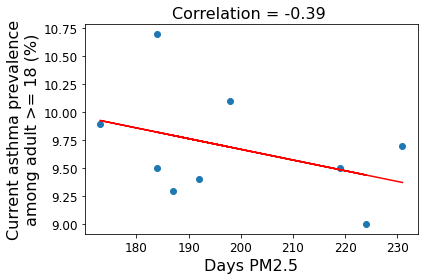

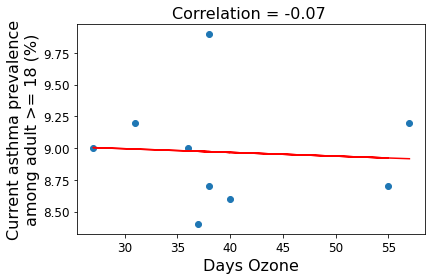

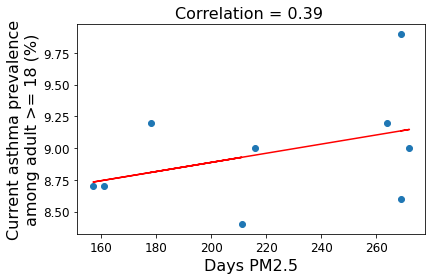

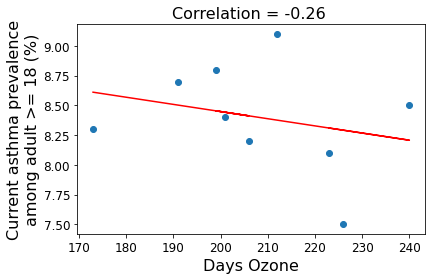

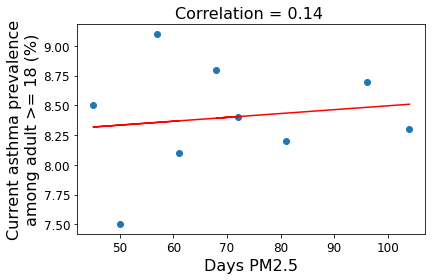

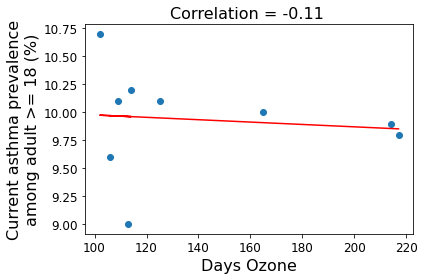

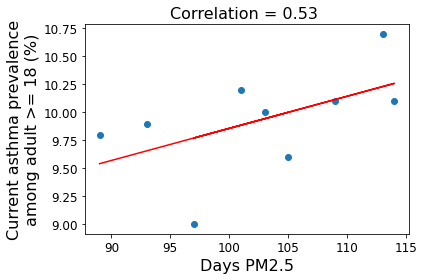

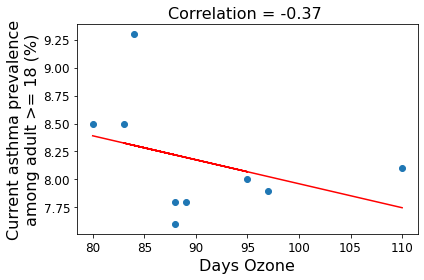

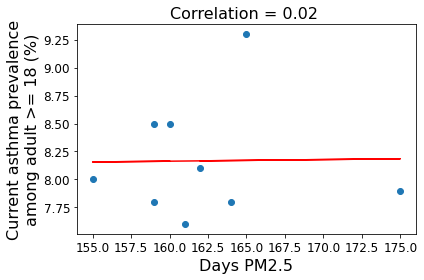

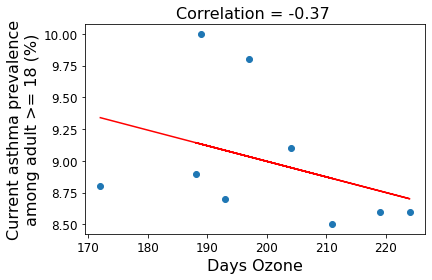

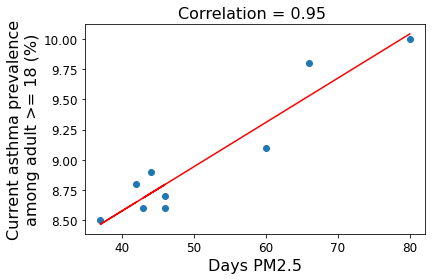

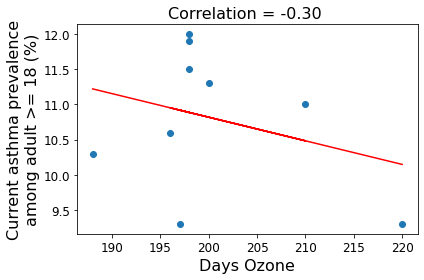

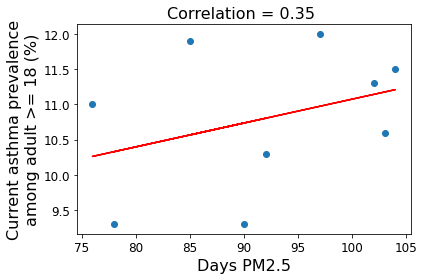

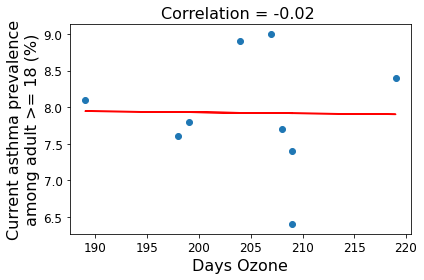

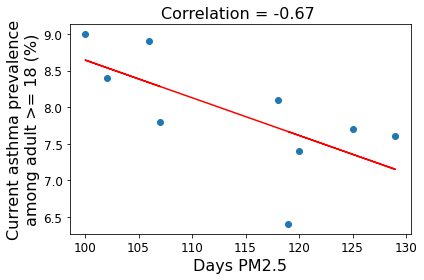

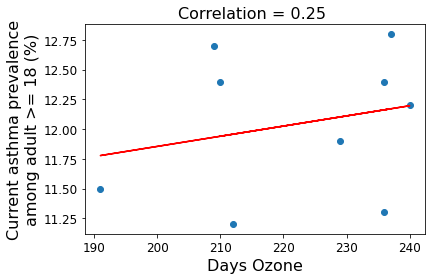

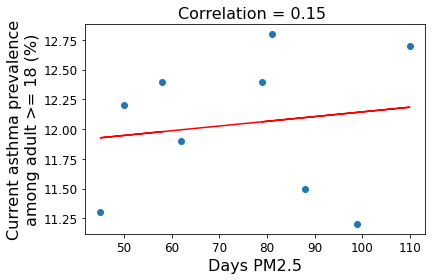

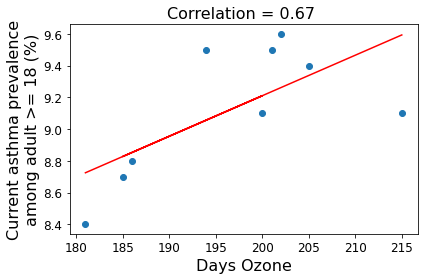

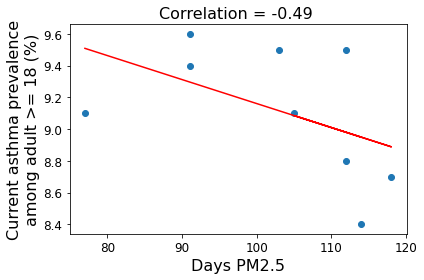

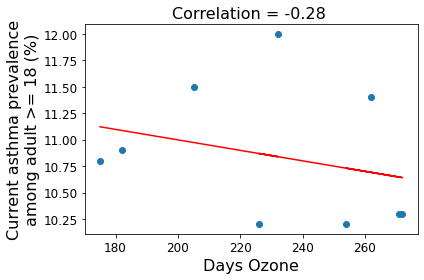

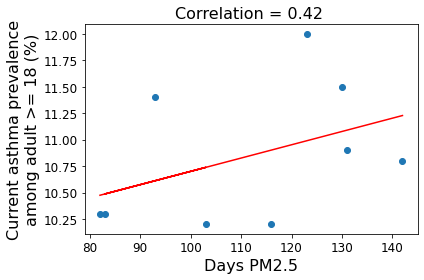

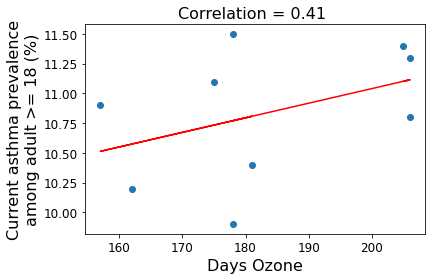

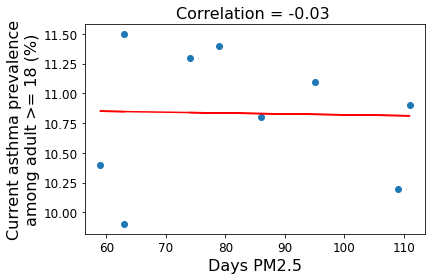

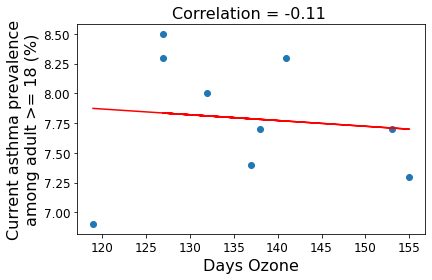

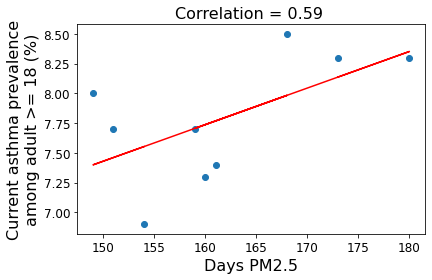

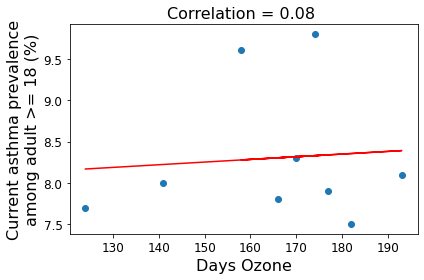

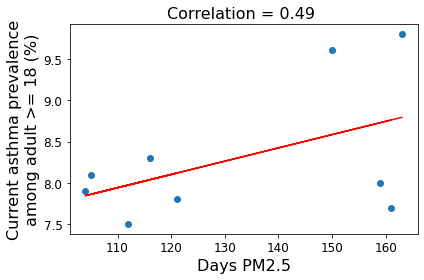

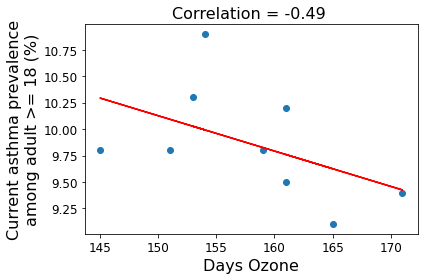

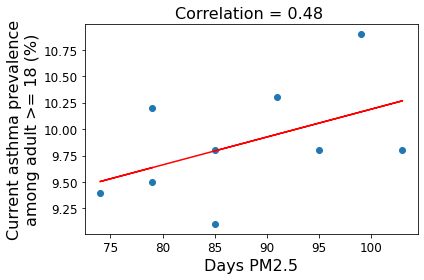

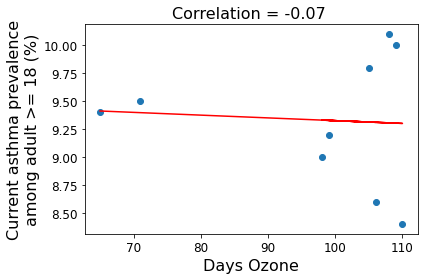

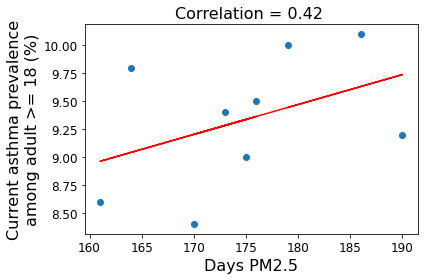

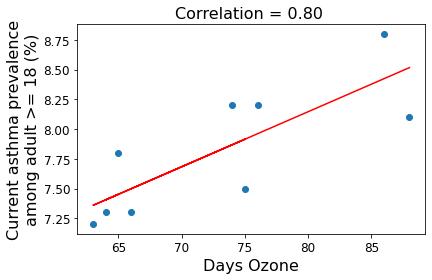

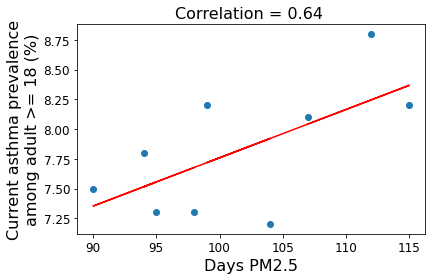

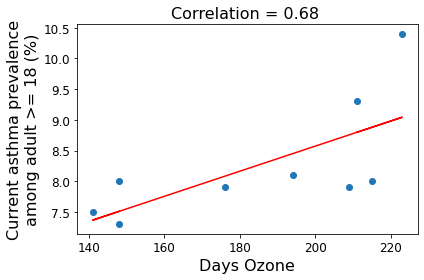

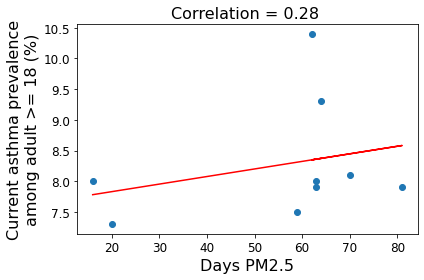

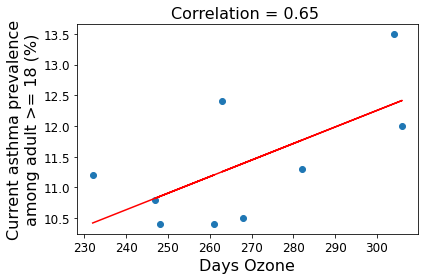

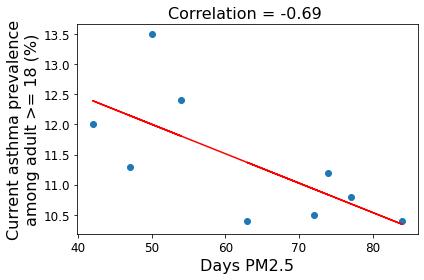

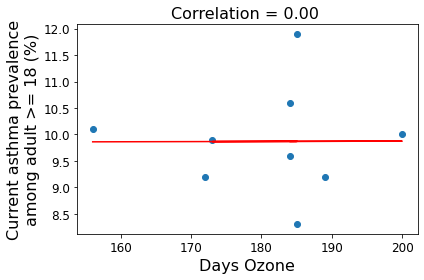

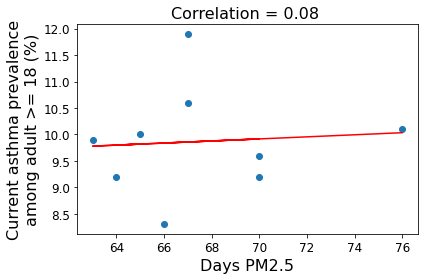

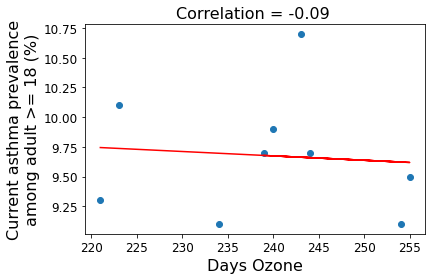

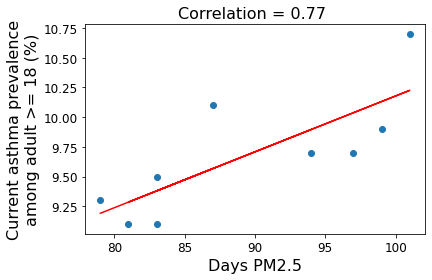

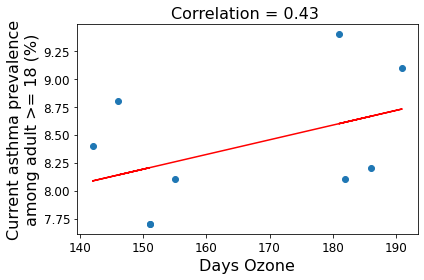

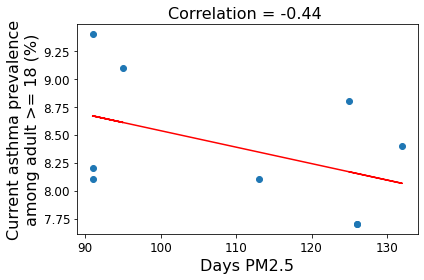

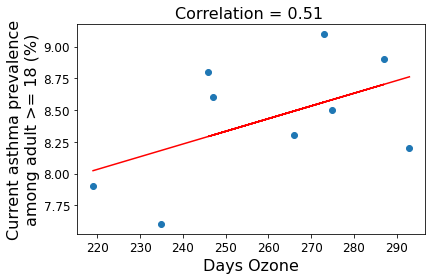

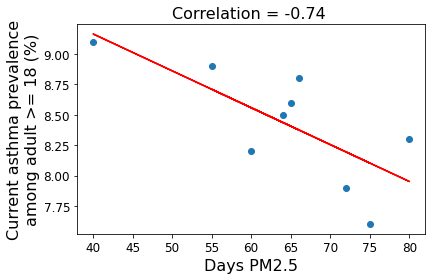

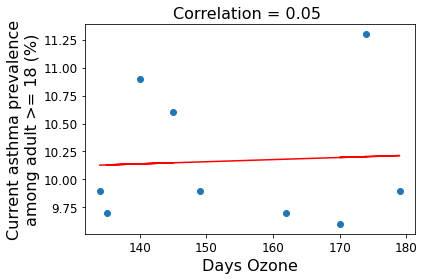

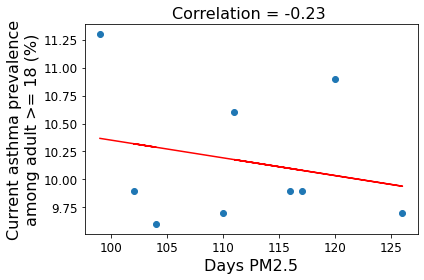

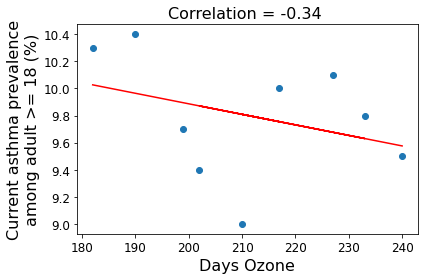

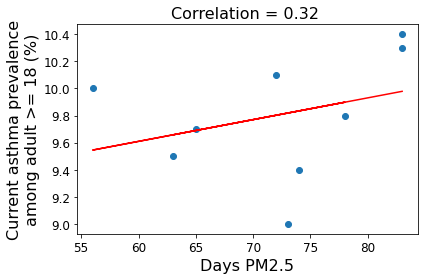

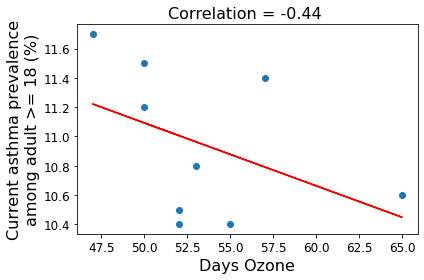

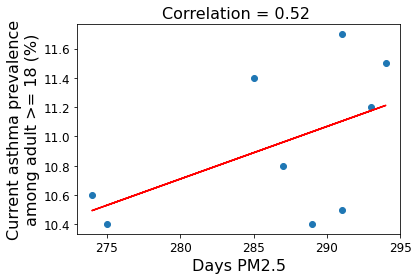

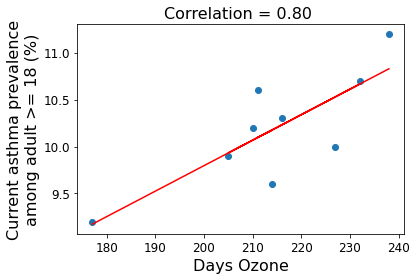

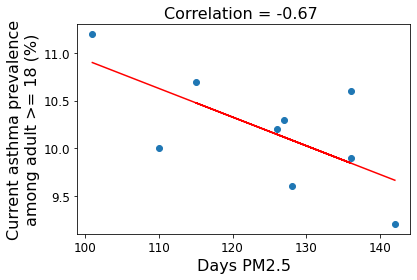

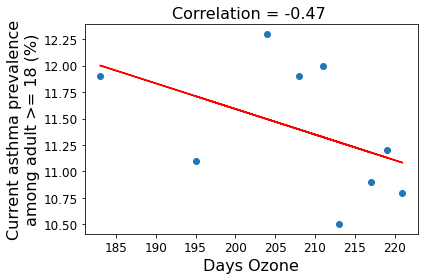

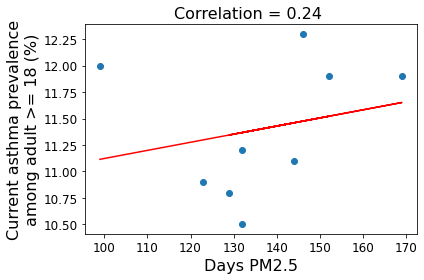

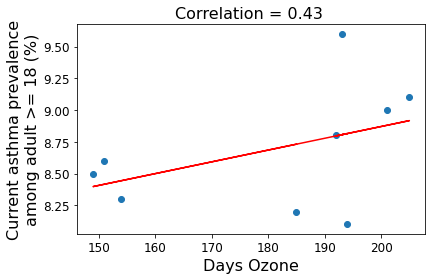

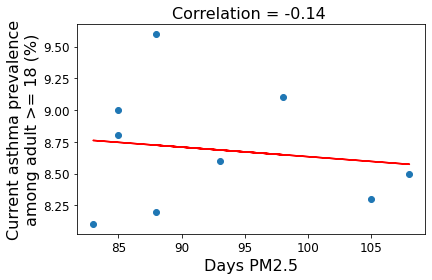

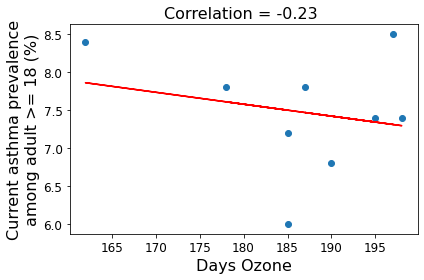

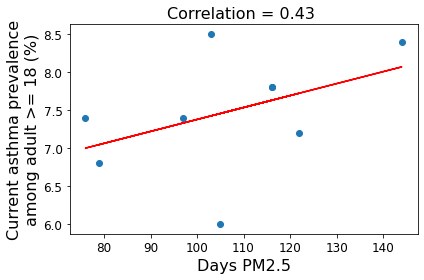

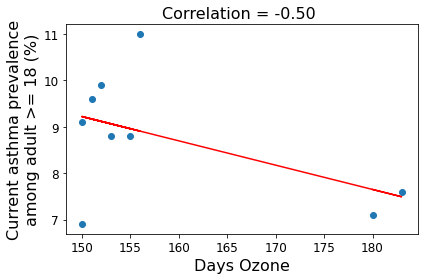

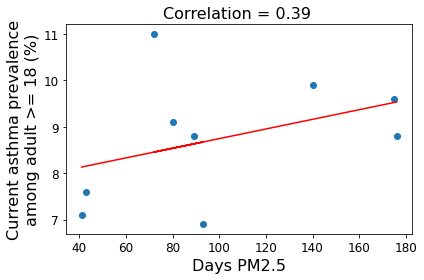

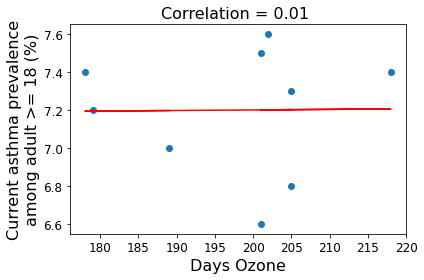

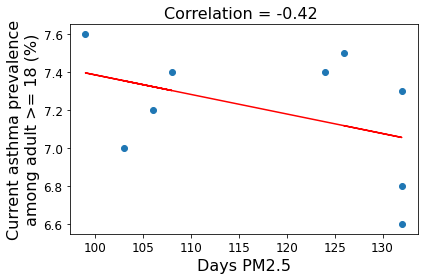

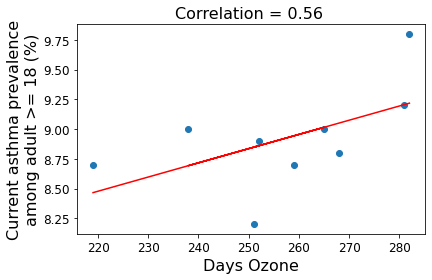

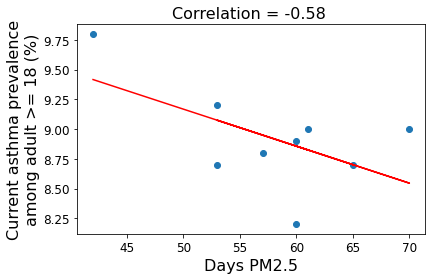

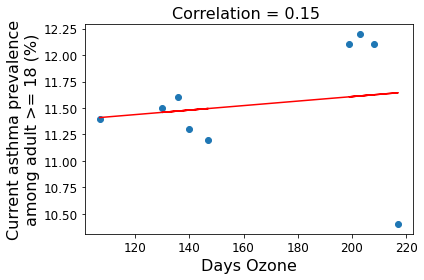

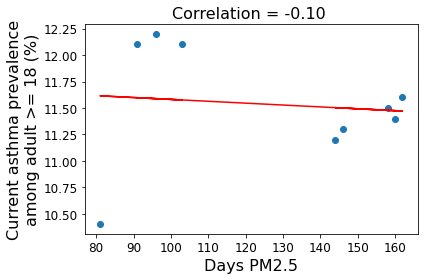

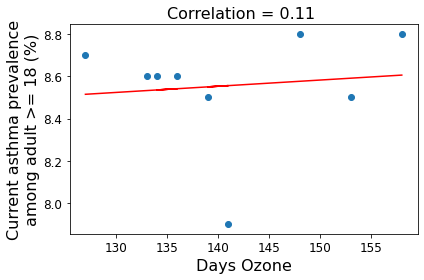

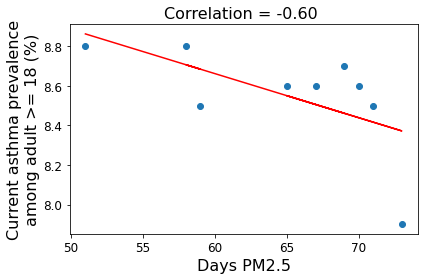

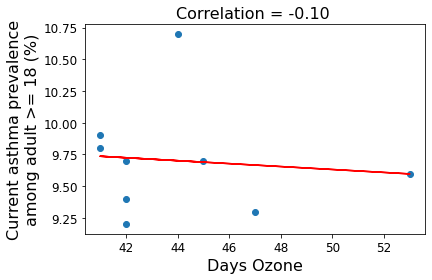

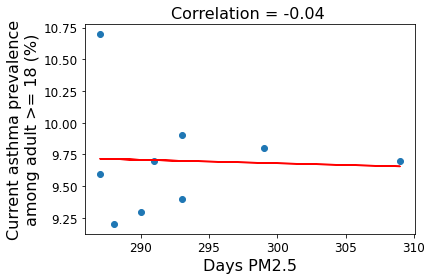

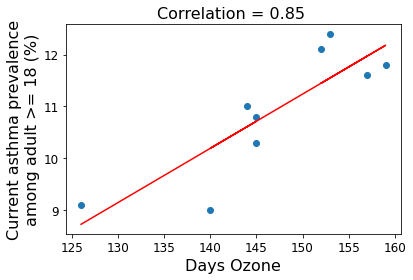

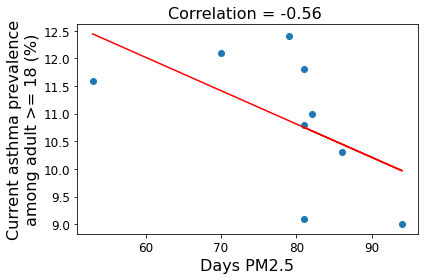

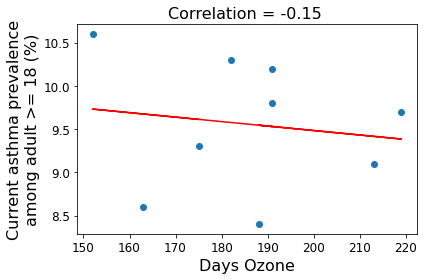

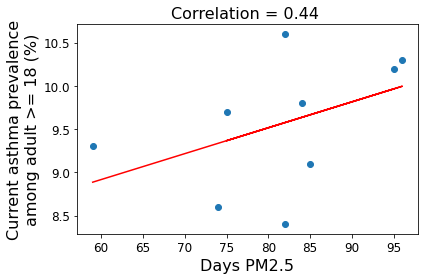

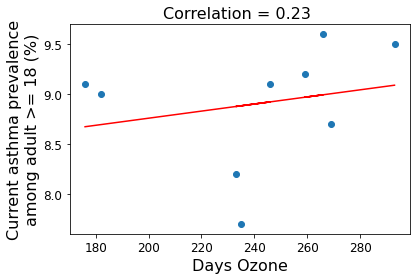

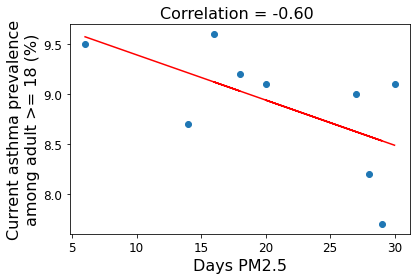

In [9]:
air_params = ['Days Ozone','Days PM2.5']
for index,state in enumerate(states):
    asthma_state = asthma[asthma['state_id'] == us_state_abbrev[state]]['datavalue'].astype(float)
    for param in air_params:
        air_state = air[air['State']==state][param]
        if len(air_state) == len(asthma_state):
            res = linregress(air_state, asthma_state)
            fig, ax = plt.subplots()
            plt.plot(air_state, asthma_state, 'o', label='original data')
            plt.plot(air_state, res.intercept + res.slope*air_state, 'r', label='regression')
            plt.xlabel(f'{param}', fontsize=(16))
            plt.ylabel(f'Current asthma prevalence\namong adult >= 18 (%)', fontsize=(16))
            plt.title(f'Correlation = {np.corrcoef(air_state, asthma_state)[0,1]:.2f} ', fontsize=(16))
            ax.tick_params(axis = 'both', labelsize=(12))
            plt.tight_layout()
            figure_name = os.path.join('.','static','images',f'{state}_{param}_regression.png')
            plt.savefig(figure_name, dpi=300)
        else:
            print(f'We are missing information for {len(air_state) - len(asthma_state)} year(s) for {state}')
    